In [36]:
!pip3 install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [39]:
!pip3 install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 12.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 3.4 MB/s eta 0:00:00a 0:00:01


In [17]:
pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.9/29.9 MB 10.0 MB/s eta 0:00:0000:010:01m

[notice] A new release of pip is available: 23.1.2 -> 24.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

Loading the dataset

In [42]:
google = pd.read_csv('/Users/divyagosula/Downloads/GOOGL_2006-01-01_to_2018-01-01.csv', parse_dates=['Date'], index_col='Date')
google.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


Preprocessing

In [43]:
#checking for missing values
missing_values = google.isnull().any().any()
print(missing_values)

False


In [45]:
#calculating daily retunrn and daily log return
google['Daily_Return'] = google['Close'].pct_change()
google['Log_Return'] = np.log(google['Close'] / google['Close'].shift(1))
google.head()


,Open,High,Low,Close,Volume,Name,Daily_Return,Log_Return
Date,,,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL,NaN,NaN
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL,0.023000,0.022739
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL,0.013507,0.013417
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL,0.031924,0.031425
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL,0.002660,0.002657


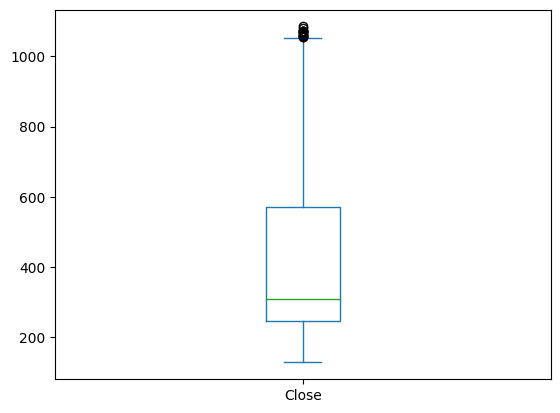

In [46]:
google['Close'].plot(kind='box')
plt.show()

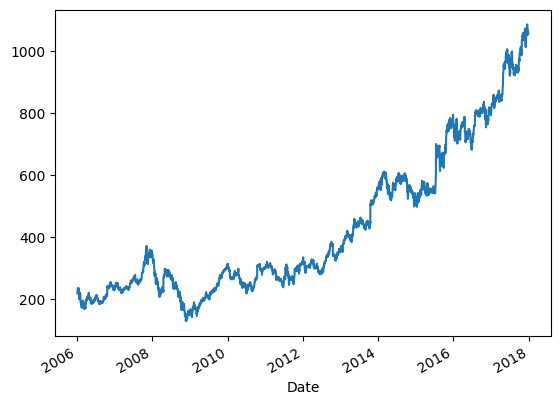

In [47]:
google['Close'].plot()
plt.show()


In [48]:
Q1 = google['Close'].quantile(0.25)
Q3 = google['Close'].quantile(0.75)
IQR = Q3 - Q1
outliers = google[(google['Close'] < (Q1 - 1.5 * IQR)) | (google['Close'] > (Q3 + 1.5 * IQR))]
print(outliers)
#removing the outliers
google_cleaned = google[(google['Close'] >= Q1 - 1.5 * IQR) & (google['Close'] <= Q3 + 1.5 * IQR)]


               Open     High      Low    Close   Volume   Name  Daily_Return   
Date                                                                           
2017-11-08  1050.05  1062.69  1047.05  1058.29  1214600  GOOGL      0.005606  \
2017-11-24  1054.39  1060.07  1051.92  1056.52   825369  GOOGL      0.004373   
2017-11-27  1058.57  1073.04  1054.77  1072.01  1771491  GOOGL      0.014661   
2017-11-28  1073.99  1080.00  1054.54  1063.29  1821171  GOOGL     -0.008134   
2017-12-14  1055.49  1067.08  1053.60  1057.47  1548139  GOOGL      0.005783   
2017-12-15  1063.78  1075.25  1060.09  1072.00  3187985  GOOGL      0.013740   
2017-12-18  1076.45  1086.49  1070.37  1085.09  1514601  GOOGL      0.012211   
2017-12-19  1083.02  1084.98  1072.27  1079.78  1317519  GOOGL     -0.004894   
2017-12-20  1080.92  1081.24  1068.60  1073.56  1436391  GOOGL     -0.005760   
2017-12-21  1075.39  1077.52  1069.00  1070.85  1282025  GOOGL     -0.002524   
2017-12-22  1070.00  1071.72  1067.64  1

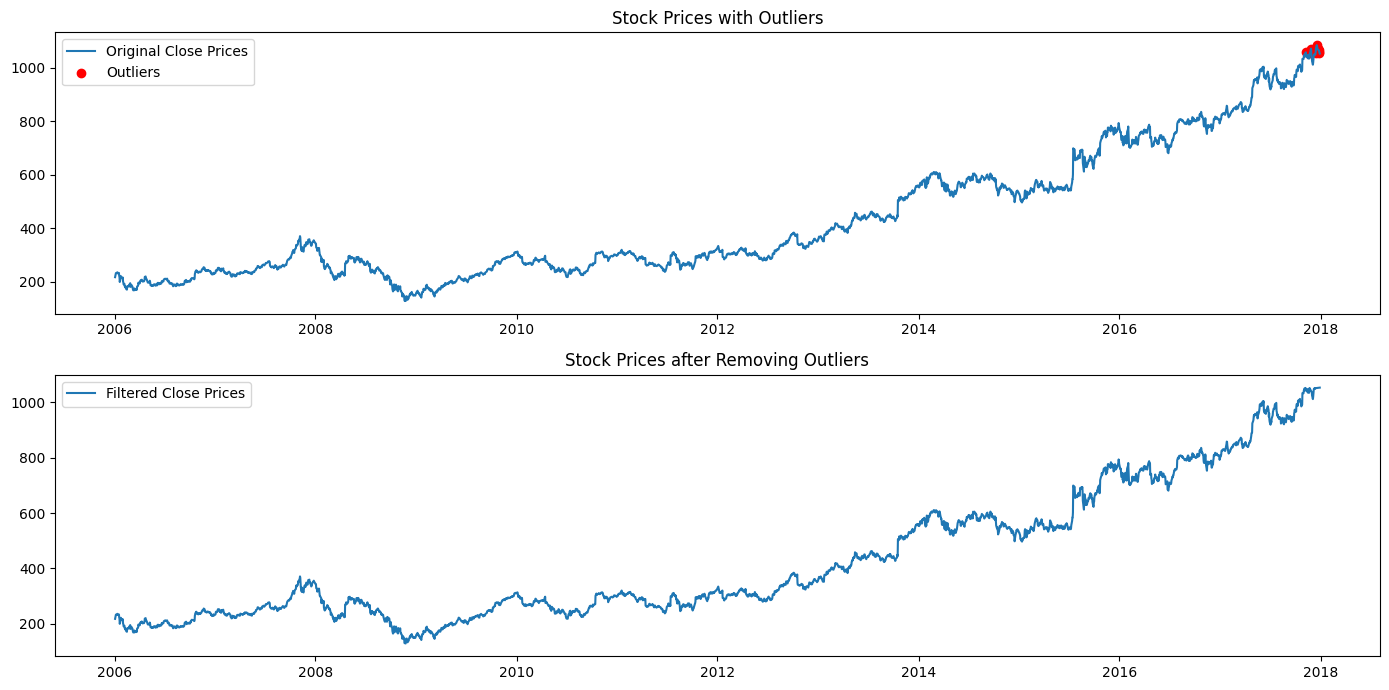

In [49]:
#before and after removing outliers
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(google.index, google['Close'], label='Original Close Prices')
plt.scatter(outliers.index, outliers['Close'], color='red', label='Outliers')
plt.title('Stock Prices with Outliers')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(google_cleaned.index, google_cleaned['Close'], label='Filtered Close Prices')
plt.title('Stock Prices after Removing Outliers')
plt.legend()

plt.tight_layout()
plt.show()

In [53]:
scaler = MinMaxScaler()
google_cleaned.loc[:, ['Open', 'High', 'Low', 'Close', 'Daily_Return', 'Log_Return']] = scaler.fit_transform(google_cleaned[['Open', 'High', 'Low', 'Close', 'Daily_Return', 'Log_Return']])
google_cleaned = google_cleaned.iloc[1:]
google_cleaned.head()

,Open,High,Low,Close,Volume,Name,Daily_Return,Log_Return
Date,,,,,,,,
2006-01-04,0.098163,0.096770,0.103689,0.101660,15292353,GOOGL,0.440182,0.478160
2006-01-05,0.099298,0.098170,0.104637,0.104916,10815661,GOOGL,0.410147,0.447664
2006-01-06,0.105181,0.108387,0.110966,0.112714,17759521,GOOGL,0.468420,0.506575
2006-01-09,0.110349,0.109948,0.115111,0.113385,12795837,GOOGL,0.375823,0.412463
2006-01-10,0.109268,0.108247,0.115703,0.114932,9104719,GOOGL,0.386769,0.423730
